Ideas - Overall complaints, borough-wise complaints, calender heat map to show seasonality, map for zip codes, scatter plot like dallas morning 

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%R

require('tidyverse')
require('ggrepel')
require('ggpubr')
require('broom')
require('AICcmodavg')
require('ggsave')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 1.0.0 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


R[write to console]: Loading required package: ggrepel

R[write to console]: Loading required package: ggpubr

R[write to console]: Loading required package: broom

R[write to console]: Loading required package: AICcmodavg

R[write to console]: Loading required package: ggsave



In [3]:
df_zip = pd.read_csv('zip_adjusted.csv')
df_zip

,year,borough,zip,complaints,pop,complaints_norm,median_income,pct_below_poverty
0,2020,MANHATTAN,10001,289,25026,1154.799009,96787,11.644505
1,2020,MANHATTAN,10002,1067,74363,1434.853354,35607,28.863569
2,2020,MANHATTAN,10003,824,54671,1507.197600,129981,7.623817
3,2020,MANHATTAN,10004,8,3310,241.691843,204949,2.469813
4,2020,MANHATTAN,10005,3,8664,34.626039,184681,6.194881
...,...,...,...,...,...,...,...,...
535,2022,QUEENS,11436,173,21248,814.194277,78306,10.440875
536,2022,QUEENS,11691,1619,70797,2286.820063,54877,24.772854
537,2022,QUEENS,11692,470,24639,1907.544949,53498,18.406970
538,2022,QUEENS,11693,146,14147,1032.020923,64688,14.837360


In [4]:
df_zip.dtypes

year                   int64
borough               object
zip                    int64
complaints             int64
pop                    int64
complaints_norm      float64
median_income          int64
pct_below_poverty    float64
dtype: object

In [5]:
df_zip['complaints_norm'] = df_zip['complaints_norm'].astype(int)
df_zip['pct_below_poverty'] = df_zip['pct_below_poverty'].astype(float)

In [6]:
df_zip['pct_below_poverty'] = df_zip['pct_below_poverty'].astype(int)

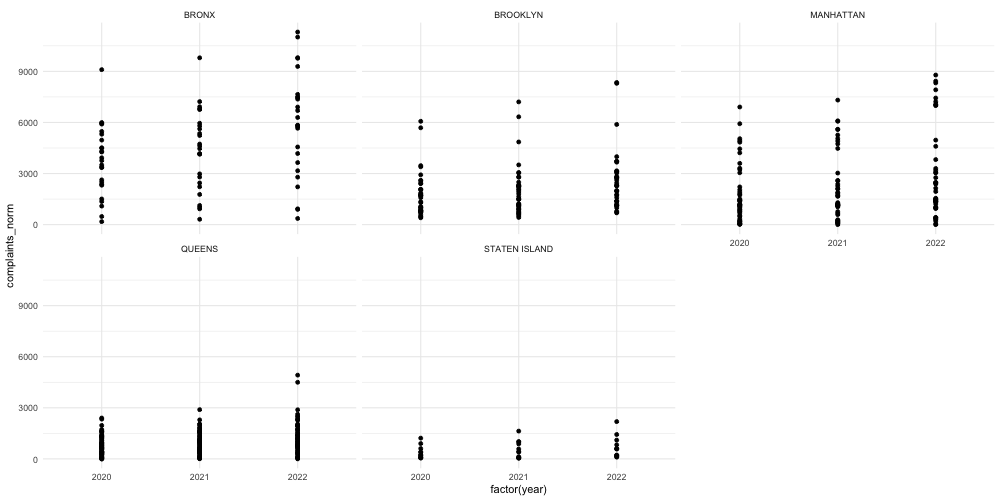

In [7]:
%%R -i df_zip -w 1000 -h 500

ggplot(df_zip, aes(x = factor(year), y = complaints_norm)) +
  geom_point() +
  facet_wrap(~ borough) +
  theme_minimal() 

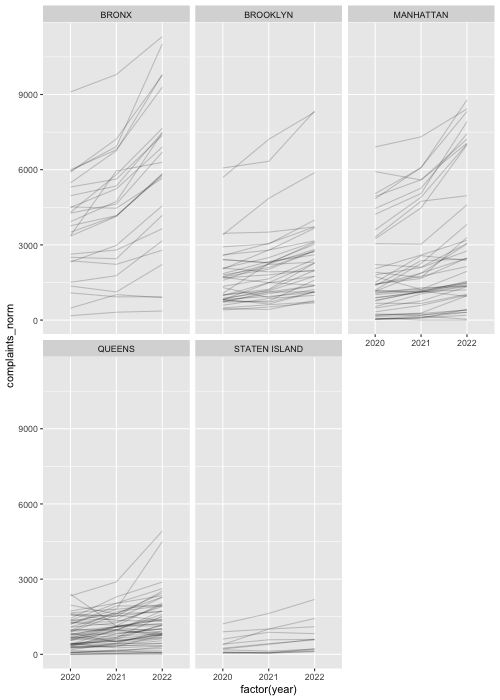

In [8]:
%%R -i df_zip -w 500 -h 700


# Create the line chart
zip_borough <- ggplot(df_zip, aes(x = factor(year), y = complaints_norm, group = zip)) +
  geom_line(alpha = 0.2) +
  # Add facet wrap by borough
  facet_wrap(~borough) +
  theme_gray()

zip_borough

In [9]:
%%R

ggsave("zip_borough.svg", zip_borough, width = 5, height = 7)

In [10]:
df_zip

,year,borough,zip,complaints,pop,complaints_norm,median_income,pct_below_poverty
0,2020,MANHATTAN,10001,289,25026,1154,96787,11
1,2020,MANHATTAN,10002,1067,74363,1434,35607,28
2,2020,MANHATTAN,10003,824,54671,1507,129981,7
3,2020,MANHATTAN,10004,8,3310,241,204949,2
4,2020,MANHATTAN,10005,3,8664,34,184681,6
...,...,...,...,...,...,...,...,...
535,2022,QUEENS,11436,173,21248,814,78306,10
536,2022,QUEENS,11691,1619,70797,2286,54877,24
537,2022,QUEENS,11692,470,24639,1907,53498,18
538,2022,QUEENS,11693,146,14147,1032,64688,14


In [11]:
# only look at zip 10467

df_zip[df_zip['zip'] == 10467]

,year,borough,zip,complaints,pop,complaints_norm,median_income,pct_below_poverty
73,2020,BRONX,10467,5006,100867,4962,40639,25
253,2021,BRONX,10467,5468,102209,5349,42639,25
433,2022,BRONX,10467,7653,102209,7487,42639,25


In [12]:

df_zip.groupby(['borough', 'year']).mean().astype(int)

zip  complaints    pop  complaints_norm  median_income  \
borough       year                                                             
BRONX         2020  10463        2365  57265             3703          47794   
              2021  10463        2802  58934             4294          50831   
              2022  10463        3860  58934             5874          50831   
BROOKLYN      2020  11221        1210  68926             1724          70049   
              2021  11221        1482  71374             2024          74499   
              2022  11221        1873  71374             2555          74499   
MANHATTAN     2020  10041         802  36073             1790         110666   
              2021  10041         979  36827             2157         117625   
              2022  10041        1297  36827             2929         117625   
QUEENS        2020  11360         367  38886              782          78748   
              2021  11360         447  40914              952          83692   
              2022  11360         587  40914             1278          83692   
STATEN ISLAND 2020  10306         137  39633              369          86134   
              2021  10306         189  41099              524          90381   
              2022  10306         254  41099              679          90381   

                    pct_below_poverty  
borough       year                     
BRONX         2020                 25  
              2021                 25  
              2022                 25  
BROOKLYN      2020                 18  
              2021                 17  
              2022                 17  
MANHATTAN     2020                 12  
              2021                 12  
              2022                 12  
QUEENS        2020                 10  
              2021                 10  
              2022                 10  
STATEN ISLAND 2020                 11  
              2021                 11  
              2022                 11

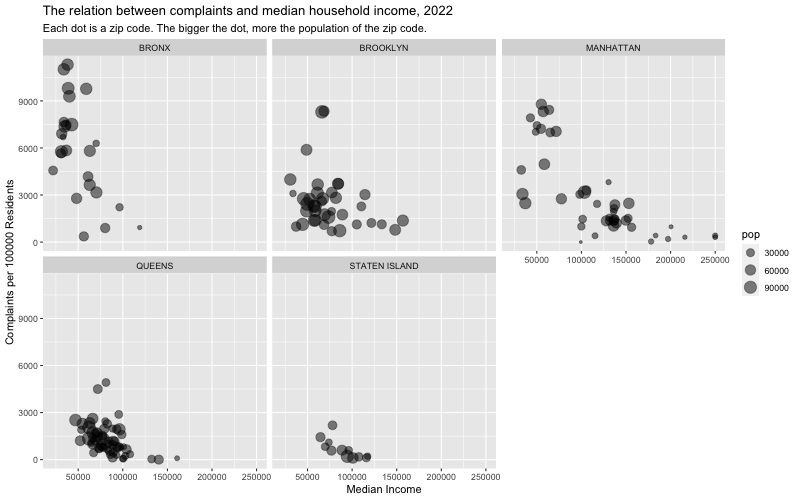

In [13]:
%%R -i df_zip -w 800 -h 500

df_zip %>%
    filter(year == '2022') %>%
    ggplot(aes(x = median_income, y = complaints_norm, size = pop)) +
    geom_point(alpha = 0.5) +
    # geom_text_repel(data = . %>% filter(complaints_norm > 7000),
                #   aes(label = zip), size = 3) +
    facet_wrap(~borough) +
    # geom_smooth(method = "lm", se = FALSE)
    labs(x = "Median Income",
    y = "Complaints per 100000 Residents",
    title = "The relation between complaints and median household income, 2022",
    subtitle = "Each dot is a zip code. The bigger the dot, more the population of the zip code.")

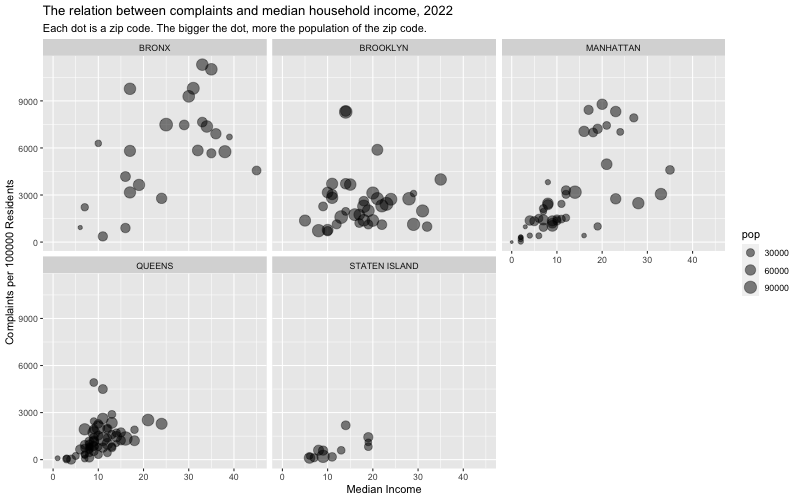

In [14]:
%%R -i df_zip -w 800 -h 500


df_zip %>%
    filter(year == '2022') %>%
    ggplot(aes(x = pct_below_poverty, y = complaints_norm, size = pop)) +
    geom_point(alpha = 0.5) +
    # geom_text_repel(data = . %>% filter(complaints_norm > 7000),
                #   aes(label = zip), size = 3) +
    facet_wrap(~borough) +
    # geom_smooth(method = "lm", se = FALSE)
    labs(x = "Median Income",
    y = "Complaints per 100000 Residents",
    title = "The relation between complaints and median household income, 2022",
    subtitle = "Each dot is a zip code. The bigger the dot, more the population of the zip code.")

In [15]:
# After checking linear regression in exploratory.ipynb, I saw that the multiple R-squared was greater for median_income. 

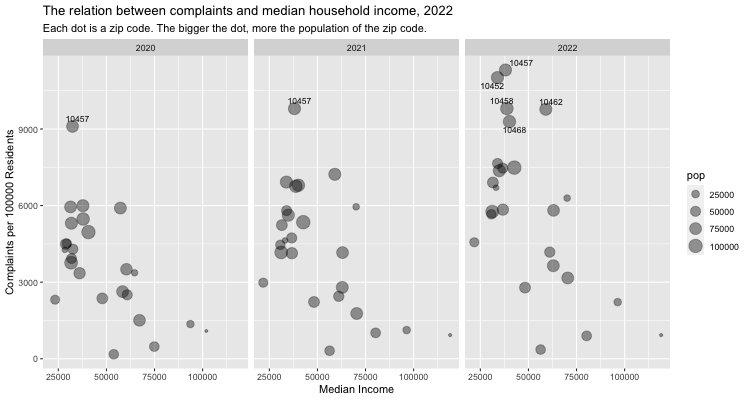

In [16]:
%%R -i df_zip -w 750 -h 400

bronx <- df_zip %>%
    filter(borough == 'BRONX') %>%
    ggplot(aes(x = median_income, y = complaints_norm, size = pop)) +
    geom_point(alpha = 0.4) +
    geom_text_repel(data = . %>% filter(complaints_norm > 9000),
                  aes(label = zip), size = 3) +
    facet_wrap(~year) +
    # geom_smooth(method = "lm", se = FALSE) +
    labs(x = "Median Income",
    y = "Complaints per 100000 Residents",
    title = "The relation between complaints and median household income, 2022",
    subtitle = "Each dot is a zip code. The bigger the dot, more the population of the zip code.")
    
bronx



In [17]:
%%R

ggsave("bronx.svg", bronx, width = 7.5, height = 4)

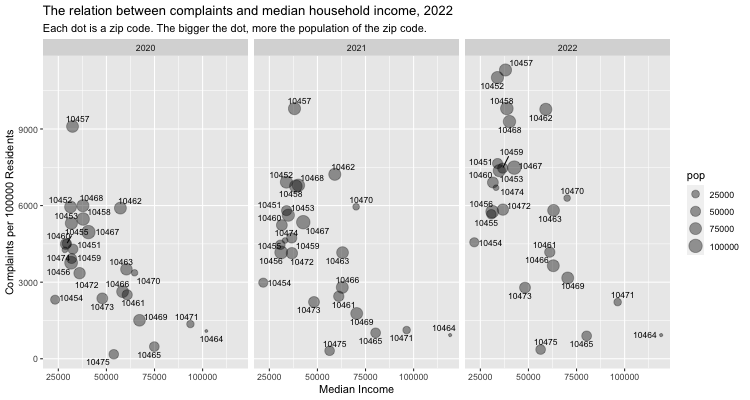

In [18]:
%%R -i df_zip -w 750 -h 400

bronx <- df_zip %>%
    filter(borough == 'BRONX') %>%
    ggplot(aes(x = median_income, y = complaints_norm, size = pop)) +
    geom_point(alpha = 0.4) +
    geom_text_repel(data = . %>% filter(complaints_norm > 1),
                  aes(label = zip), size = 3) +
    facet_wrap(~year) +
    # geom_smooth(method = "lm", se = FALSE) +
    labs(x = "Median Income",
    y = "Complaints per 100000 Residents",
    title = "The relation between complaints and median household income, 2022",
    subtitle = "Each dot is a zip code. The bigger the dot, more the population of the zip code.")
    
bronx

In [19]:
df_address = pd.read_parquet('address_level.parquet')
df_address


,year,borough,zip,incident_address,lat,long,num_complaints
0,2020,BRONX,10451,1020 GRAND CONCOURSE,40.830314,-73.920785,1
1,2020,BRONX,10451,109 EAST 153 STREET,40.823932,-73.928033,108
2,2020,BRONX,10451,175 EAST 151 STREET,40.820882,-73.927299,2
3,2020,BRONX,10451,180 EAST 162 STREET,40.827449,-73.921442,2
4,2020,BRONX,10451,180 EAST 163 STREET,40.828272,-73.920754,2
...,...,...,...,...,...,...,...
106127,2022,STATEN ISLAND,10314,81 CHURCH AVENUE,40.592844,-74.185280,1
106128,2022,STATEN ISLAND,10314,90 RICHMOND HILL ROAD,40.587616,-74.165297,1
106129,2022,STATEN ISLAND,10314,90 RICHMOND HILL ROAD,40.587651,-74.165359,5
106130,2022,STATEN ISLAND,10314,98 NOSTRAND AVENUE,40.606914,-74.169706,1


In [20]:
# address with most complaints in 2022

df_address[df_address['year'] == 2022].sort_values(by = 'num_complaints', ascending = False).head(10)

,year,borough,zip,incident_address,lat,long,num_complaints
67181,2022,BRONX,10457,2176 TIEBOUT AVENUE,40.854439,-73.898423,3310
64586,2022,BRONX,10452,957 WOODYCREST AVENUE,40.831527,-73.928863,1423
98247,2022,QUEENS,11106,31-35 CRESCENT STREET,40.764684,-73.927184,1172
70069,2022,BRONX,10462,2040 BRONXDALE AVENUE,40.850795,-73.866537,933
73185,2022,BRONX,10469,932 ADEE AVENUE,40.869572,-73.860165,768
68198,2022,BRONX,10458,357 EAST 201 STREET,40.869586,-73.882632,600
68772,2022,BRONX,10459,919 PROSPECT AVENUE,40.821710,-73.900789,560
86645,2022,BROOKLYN,11236,9101 CHURCH AVENUE,40.653504,-73.918868,550
79619,2022,BROOKLYN,11214,8851 20 AVENUE,40.599578,-74.003453,542
73641,2022,BRONX,10472,1230 LELAND AVENUE,40.831177,-73.863317,537


In [21]:

df_address[(df_address['incident_address'] == "2176 TIEBOUT AVENUE")]

,year,borough,zip,incident_address,lat,long,num_complaints
2235,2020,BRONX,10457,2176 TIEBOUT AVENUE,40.854439,-73.898423,3242
30935,2021,BRONX,10457,2176 TIEBOUT AVENUE,40.854439,-73.898423,3707
67181,2022,BRONX,10457,2176 TIEBOUT AVENUE,40.854439,-73.898423,3310


In [22]:
# total complaints per year

df_address.groupby('year').sum().astype(int)

,lat,long,num_complaints
year,,,
2020,1137242,-2063158,164990
2021,1455291,-2640012,199547
2022,1731940,-3141977,264380


In [23]:
# total complaints per year from zip code 10457 

df_address[df_address['zip'] == 10457].groupby('year').sum().astype(int)

# 4% in 2020, almost 4% in 2021, 3% in 2022

,lat,long,num_complaints
year,,,


In [24]:
# total complaints from bronx

df_address[df_address['borough'] == 'BRONX'].groupby('year').sum().astype(int)

,lat,long,num_complaints
year,,,
2020,291912,-527994,59145
2021,379812,-687005,70138
2022,437006,-790447,96515
